In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
objects_zdrav = gpd.read_file('data/objects_zdrav.geojson')

In [3]:
data = objects_zdrav
data.head(3)

,id,name,city,street,house,post,x,y,cpi_id,geometry
0,497,"Зубной лекарь, стоматологическая клиника, ООО ...",Архангельск,Троицкий проспект,12,,40.531366,64.532504,15347,POINT (4511931.077 9486294.630)
1,540,"Северодвинская городская больница №1, ГБУЗ",Северодвинск (Северодвинск городской округ),Серго Орджоникидзе,2а,164512,39.784852,64.561244,16904,POINT (4428829.428 9493738.840)
2,1196,"Стоматошка, ООО, центр семейной стоматологии",Северодвинск (Северодвинск городской округ),Ломоносова,97,164522,39.768076,64.547978,37139,POINT (4426962.001 9490301.724)


In [4]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
objects_tourism = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,id,name,city,street,house,post,x,y,cpi_id,geometry
0,497,"Зубной лекарь, стоматологическая клиника, ООО ...",Архангельск,Троицкий проспект,12,,40.531366,64.532504,15347,POINT (40.53137 64.53250)
1,540,"Северодвинская городская больница №1, ГБУЗ",Северодвинск (Северодвинск городской округ),Серго Орджоникидзе,2а,164512,39.784852,64.561244,16904,POINT (39.78485 64.56124)
2,1196,"Стоматошка, ООО, центр семейной стоматологии",Северодвинск (Северодвинск городской округ),Ломоносова,97,164522,39.768076,64.547978,37139,POINT (39.76808 64.54798)


<Axes: >

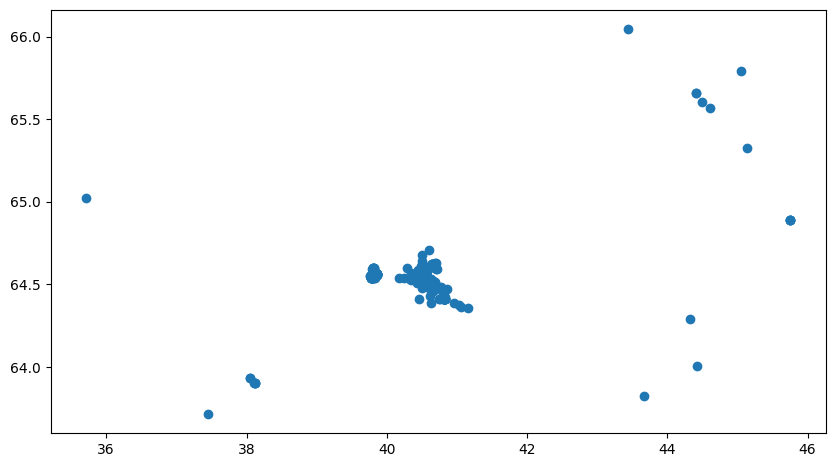

In [5]:
data.plot(figsize=(10,10))

In [6]:
data[data.id == 497]

,id,name,city,street,house,post,x,y,cpi_id,geometry
0,497,"Зубной лекарь, стоматологическая клиника, ООО ...",Архангельск,Троицкий проспект,12,,40.531366,64.532504,15347,POINT (40.53137 64.53250)


In [7]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        obj = {}
        obj['id'] = objectid
        obj['name'] = row.name
        obj['city'] = row.city
        obj['street'] = row.street
        obj['house'] = row.house
        obj['post'] = row.post
        obj['cpi_id'] = row.cpi_id
        obj['geometry'] = [row['y'], row['x']]

        all_res.append(obj)

data = objects_zdrav
objectids = data.id
#objectids = [ 497 ]
for objectid in objectids:
    convert(objectid)

objects_zdrav_df = pd.DataFrame(all_res)
data = objects_zdrav_df
data

,id,name,city,street,house,post,cpi_id,geometry
0,497,0,Архангельск,Троицкий проспект,12,,15347,"[64.53250401, 40.53136647]"
1,540,1,Северодвинск (Северодвинск городской округ),Серго Орджоникидзе,2а,164512,16904,"[64.56124396, 39.78485166]"
2,1196,2,Северодвинск (Северодвинск городской округ),Ломоносова,97,164522,37139,"[64.54797801, 39.76807628]"
3,1449,3,Архангельск,Советских Космонавтов проспект,115,163000,44992,"[64.54532494, 40.53248396]"
4,1499,4,Северодвинск (Северодвинск городской округ),Железнодорожная,34,164521,46921,"[64.5613773, 39.85642633]"
...,...,...,...,...,...,...,...,...
480,209424,480,,,,,12924,"[63.7150883, 37.4507819]"
481,211656,481,,,,,15474,"[63.9034171, 38.1029446]"
482,211665,482,,,,,15483,"[63.9045936, 38.1182867]"
483,211666,483,,,,,15484,"[63.903717, 38.1179686]"


In [8]:
data.to_csv('data/objects_zdrav_lense.csv', index=False)